In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")
sample_sub = pd.read_csv("/kaggle/input/playground-series-s5e3/sample_submission.csv")

train.drop(columns='id',inplace=True)
test.drop(columns='id',inplace=True)
train.info()

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            2190 non-null   int64  
 1   pressure       2190 non-null   float64
 2   maxtemp        2190 non-null   float64
 3   temparature    2190 non-null   float64
 4   mintemp        2190 non-null   float64
 5   dewpoint       2190 non-null   float64
 6   humidity       2190 non-null   float64
 7   cloud          2190 non-null   float64
 8   sunshine       2190 non-null   float64
 9   winddirection  2190 non-null   float64
 10  windspeed      2190 non-null   float64
 11  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 205.4 KB


In [2]:
display(train.nunique())
print("=="*30)
display(test.nunique())

day              365
pressure         236
maxtemp          219
temparature      198
mintemp          199
dewpoint         218
humidity          49
cloud             78
sunshine         120
winddirection     35
windspeed        223
rainfall           2
dtype: int64

day              365
pressure         185
maxtemp          182
temparature      175
mintemp          171
dewpoint         172
humidity          42
cloud             69
sunshine         110
winddirection     29
windspeed        205
dtype: int64

In [3]:
train.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [4]:
def column_range(df,col):
    print(f'Range of column: {col}')
    print(df[col].max()-df[col].min())
    print(f'Max value: {df[col].max()}')
    print(f'Min value: {df[col].min()}')
    print("=="*50)
for col in train.columns.tolist():
    column_range(train,col)

Range of column: day
364
Max value: 365
Min value: 1
Range of column: pressure
35.59999999999991
Max value: 1034.6
Min value: 999.0
Range of column: maxtemp
25.6
Max value: 36.0
Min value: 10.4
Range of column: temparature
24.1
Max value: 31.5
Min value: 7.4
Range of column: mintemp
25.8
Max value: 29.8
Min value: 4.0
Range of column: dewpoint
27.0
Max value: 26.7
Min value: -0.3
Range of column: humidity
59.0
Max value: 98.0
Min value: 39.0
Range of column: cloud
98.0
Max value: 100.0
Min value: 2.0
Range of column: sunshine
12.1
Max value: 12.1
Min value: 0.0
Range of column: winddirection
290.0
Max value: 300.0
Min value: 10.0
Range of column: windspeed
55.1
Max value: 59.5
Min value: 4.4
Range of column: rainfall
1
Max value: 1
Min value: 0


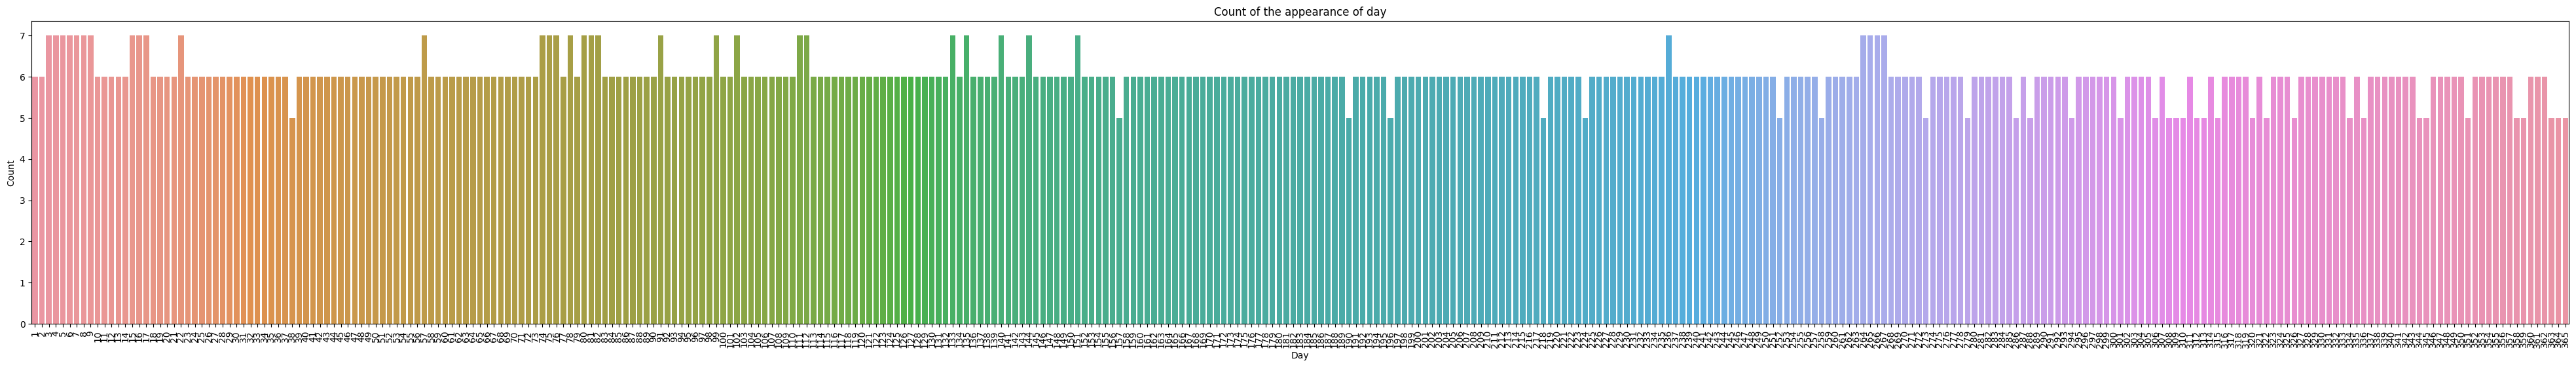

In [5]:
day_counts = train['day'].value_counts()
# Plot using seaborn
plt.figure(figsize=(50, 6))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Count of the appearance of day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [6]:
# Filter for days that appear exactly 7 times
days_with_7_counts = day_counts[day_counts == 7].index.tolist()

# Filter for days that appear exactly 5 times
days_with_5_counts = day_counts[day_counts == 5].index.tolist()

# Print or use the lists
print("Days that appear 7 times:", days_with_7_counts)
print("Days that appear 5 times:", days_with_5_counts)


Days that appear 7 times: [91, 144, 267, 140, 111, 112, 236, 135, 82, 265, 81, 80, 78, 76, 75, 74, 266, 22, 17, 133, 3, 4, 5, 6, 7, 8, 9, 16, 102, 57, 99, 264, 15, 151]
Days that appear 5 times: [273, 196, 358, 359, 351, 252, 258, 190, 363, 364, 345, 301, 334, 344, 294, 224, 306, 308, 309, 310, 312, 313, 315, 218, 279, 320, 322, 326, 288, 157, 286, 38, 336, 365]


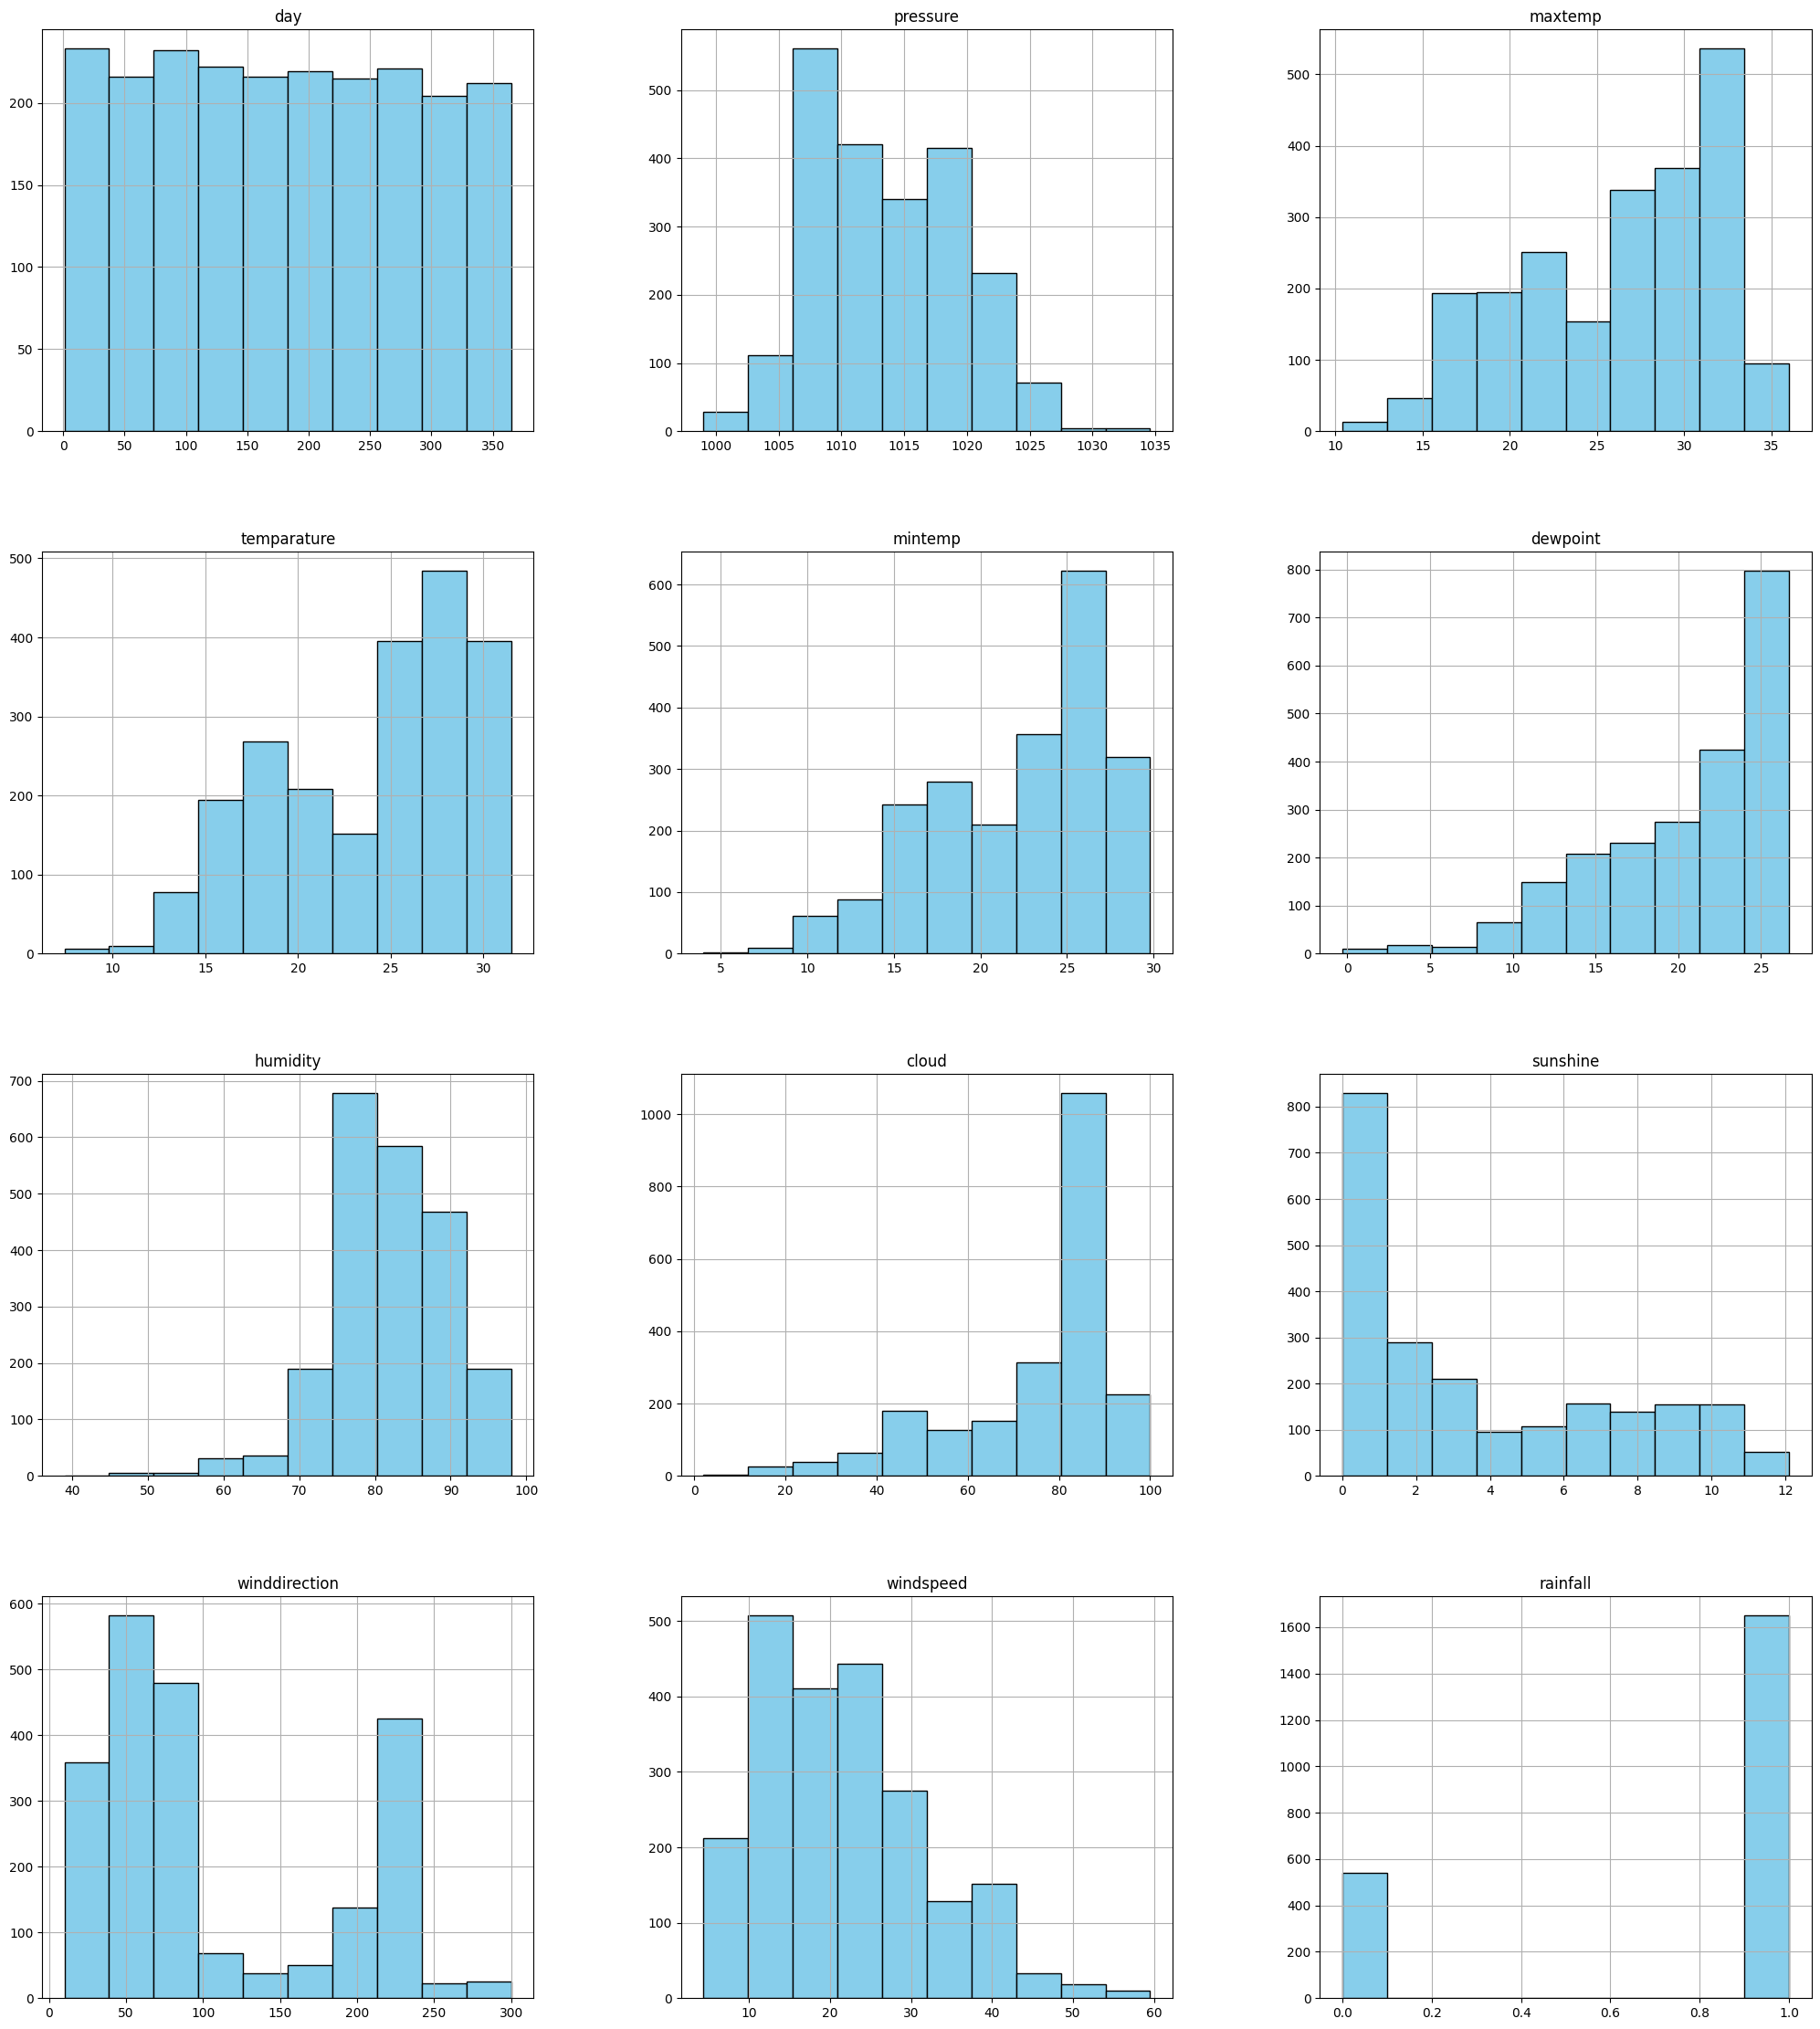

In [7]:
train.hist(figsize=(25,28),color = 'skyblue', edgecolor='black')
plt.show()

In [8]:
# 🟢 1. Handling Time Features (Assuming 'day' represents sequential days)
train["month"] = ((train["day"] - 1) // 30) % 12 + 1  # Approximate month
train["season"] = train["month"].map({
    12: "Winter", 1: "Winter", 2: "Winter", 
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn"
})
train["day_of_week"] = train["day"] % 7  # Approximate day of the week
train["is_weekend"] = train["day_of_week"].isin([6, 0]).astype(int)  # 0=Sunday, 6=Saturday

def eda(df):
    df['month_name'] = pd.to_datetime(df['month'], format='%m').dt.strftime('%B')
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12) 
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 365)  
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 365)
    # why using sin/cos? to tell model that after Dec we have Jan, of we dont do this it will
    # consider 1 to 12 and then 12 to 1 wont be considered. same applies on week day also
    # this is universal funnction whenever we have date.
    dummy_prefixes = ['month_name','day_of_week','season']
    df = pd.get_dummies(df, columns=dummy_prefixes, drop_first=True)

    return df
train = eda(train)
# 🟢 2. Temperature Features
train["temp_range"] = train["maxtemp"] - train["mintemp"]
train["dewpoint_depression"] = train["temparature"] - train["dewpoint"]
train["temp_diff"] = train["maxtemp"] - train["temparature"]

# 🟢 3. Humidity & Pressure Features
train["humidity_pressure_ratio"] = train["humidity"] / train["pressure"]
train["dewpoint_humidity_ratio"] = train["dewpoint"] / train["humidity"]
train["pressure_change"] = train["pressure"].diff()

# 🟢 4. Cloud & Sunshine Features
train["cloud_sunshine_ratio"] = train["cloud"] / (train["sunshine"] + 1e-6)  # Avoid division by zero
#train["sunshine_category"] = pd.cut(train["sunshine"], bins=[0, 4, 8, 12], labels=["Low", "Medium", "High"])

# 🟢 5. Wind Features
train["wind_speed_squared"] = train["windspeed"] ** 2
train["wind_chill"] = train["temparature"] - (train["windspeed"] * 0.1)  # Simple approximation

# Convert wind direction into sine & cosine features
train["wind_x"] = np.sin(np.radians(train["winddirection"]))
train["wind_y"] = np.cos(np.radians(train["winddirection"]))

train['pressure_change'].fillna(method='ffill', inplace=True)
train['wind_x'].fillna(method='ffill', inplace=True)
train['wind_y'].fillna(method='ffill', inplace=True)
# Display the first few rows
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      2190 non-null   int64  
 1   pressure                 2190 non-null   float64
 2   maxtemp                  2190 non-null   float64
 3   temparature              2190 non-null   float64
 4   mintemp                  2190 non-null   float64
 5   dewpoint                 2190 non-null   float64
 6   humidity                 2190 non-null   float64
 7   cloud                    2190 non-null   float64
 8   sunshine                 2190 non-null   float64
 9   winddirection            2190 non-null   float64
 10  windspeed                2190 non-null   float64
 11  rainfall                 2190 non-null   int64  
 12  month                    2190 non-null   int64  
 13  is_weekend               2190 non-null   int64  
 14  month_sin               

<ipython-input-8-05f595c064e9>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['pressure_change'].fillna(method='ffill', inplace=True)
<ipython-input-8-05f595c064e9>:48: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['pressure_change'].fillna(method='ffill', inplace=True)
<ipython-input-8-05f595c064e9>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace 

In [9]:
# 🟢 1. Handling Time Features (Assuming 'day' represents sequential days)
test["month"] = ((test["day"] - 1) // 30) % 12 + 1  # Approximate month
test["season"] = test["month"].map({
    12: "Winter", 1: "Winter", 2: "Winter", 
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn"
})
test["day_of_week"] = test["day"] % 7  # Approximate day of the week
test["is_weekend"] = test["day_of_week"].isin([6, 0]).astype(int)  # 0=Sunday, 6=Saturday

def eda(df):
    df['month_name'] = pd.to_datetime(df['month'], format='%m').dt.strftime('%B')
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12) 
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 365)  
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 365)
    # why using sin/cos? to tell model that after Dec we have Jan, of we dont do this it will
    # consider 1 to 12 and then 12 to 1 wont be considered. same applies on week day also
    # this is universal funnction whenever we have date.
    dummy_prefixes = ['month_name','day_of_week','season']
    df = pd.get_dummies(df, columns=dummy_prefixes, drop_first=True)

    return df
test = eda(test)
# 🟢 2. Temperature Features
test["temp_range"] = test["maxtemp"] - test["mintemp"]
test["dewpoint_depression"] = test["temparature"] - test["dewpoint"]
test["temp_diff"] = test["maxtemp"] - test["temparature"]

# 🟢 3. Humidity & Pressure Features
test["humidity_pressure_ratio"] = test["humidity"] / test["pressure"]
test["dewpoint_humidity_ratio"] = test["dewpoint"] / test["humidity"]
test["pressure_change"] = test["pressure"].diff()

# 🟢 4. Cloud & Sunshine Features
test["cloud_sunshine_ratio"] = test["cloud"] / (test["sunshine"] + 1e-6)  # Avoid division by zero
#test["sunshine_category"] = pd.cut(test["sunshine"], bins=[0, 4, 8, 12], labels=["Low", "Medium", "High"])

# 🟢 5. Wind Features
test["wind_speed_squared"] = test["windspeed"] ** 2
test["wind_chill"] = test["temparature"] - (test["windspeed"] * 0.1)  # Simple approximation

# Convert wind direction into sine & cosine features
test["wind_x"] = np.sin(np.radians(test["winddirection"]))
test["wind_y"] = np.cos(np.radians(test["winddirection"]))

test['pressure_change'].fillna(method='ffill', inplace=True)
test['wind_x'].fillna(method='ffill', inplace=True)
test['wind_y'].fillna(method='ffill', inplace=True)
# Display the first few rows
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      730 non-null    int64  
 1   pressure                 730 non-null    float64
 2   maxtemp                  730 non-null    float64
 3   temparature              730 non-null    float64
 4   mintemp                  730 non-null    float64
 5   dewpoint                 730 non-null    float64
 6   humidity                 730 non-null    float64
 7   cloud                    730 non-null    float64
 8   sunshine                 730 non-null    float64
 9   winddirection            729 non-null    float64
 10  windspeed                730 non-null    float64
 11  month                    730 non-null    int64  
 12  is_weekend               730 non-null    int64  
 13  month_sin                730 non-null    float64
 14  month_cos                7

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-9-3221c8260db1>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['pressure_change'].fillna(method='ffill', inplace=True)
<ipython-input-9-3221c8260db1>:48: FutureWarni

In [10]:
from sklearn.model_selection import train_test_split
X = train.drop(['rainfall'], axis=1)
y = train['rainfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score


# Step 2: Initialize the LGBMClassifier
lgb_model = lgb.LGBMClassifier(verbosity=-1,eval_metric='auc', random_state=42)

# Step 3: Define the StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store predictions and true labels
y_true = []
y_pred_proba = []
preds = []
# Step 4: Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    # Split data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training set
    lgb_model.fit(X_train, y_train)
    
    # Predict probabilities for the validation set (class 1)
    y_val_pred_proba = lgb_model.predict_proba(X_val)[:, 1]
    preds.append(lgb_model.predict_proba(test)[:, 1])
    
    # Append true labels and predicted probabilities
    y_true.extend(y_val)
    y_pred_proba.extend(y_val_pred_proba)
# Step 5: Calculate the overall AUC-ROC score
auc_roc = roc_auc_score(y_true, y_pred_proba)
print(f"AUC-ROC Score: {auc_roc}")

submission = pd.DataFrame({'id': sample_sub.id, 'rainfall': np.mean(preds, axis=0)})
print(submission.head())
submission.to_csv('submission_lgb.csv', index=False)

AUC-ROC Score: 0.8659102132435466
     id  rainfall
0  2190  0.999684
1  2191  0.999766
2  2192  0.990053
3  2193  0.054028
4  2194  0.017731


In [11]:
cat_params = {'iterations': 200, 'depth': 7, 'learning_rate': 0.010733229135951608, 'l2_leaf_reg': 9.420338592935268, 'border_count': 111, 'random_strength': 1.747519133235308, 'bagging_temperature': 0.2180503909839279}
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np


# Step 2: Initialize the CatBoostClassifier
catboost_model = CatBoostClassifier(**cat_params,verbose=0)  # Set verbose=0 to avoid too much output during training

# Step 3: Define the StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store predictions and true labels
y_true = []
y_pred_proba = []
preds = []

# Step 4: Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    # Split data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training set
    catboost_model.fit(X_train, y_train)
    
    # Predict probabilities for the validation set (class 1)
    y_val_pred_proba = catboost_model.predict_proba(X_val)[:, 1]
    preds.append(catboost_model.predict_proba(test)[:, 1])
    
    # Append true labels and predicted probabilities
    y_true.extend(y_val)
    y_pred_proba.extend(y_val_pred_proba)

# Step 5: Calculate the overall AUC-ROC score
auc_roc = roc_auc_score(y_true, y_pred_proba)
print(f"AUC-ROC Score: {auc_roc}")

submission = pd.DataFrame({'id': sample_sub.id, 'rainfall': np.mean(preds, axis=0)})
print(submission.head())
submission.to_csv('submission_cat.csv', index=False)

AUC-ROC Score: 0.8890953984287318
     id  rainfall
0  2190  0.948240
1  2191  0.954905
2  2192  0.918080
3  2193  0.139994
4  2194  0.105761


In [21]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score
!pip install --upgrade lightgbm


# Assuming 'train', 'test', and 'sample_sub' DataFrames are already loaded.
X = train.drop(['rainfall'], axis=1)
y = train['rainfall']

# Define parameter grid for tuning
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.05],
    'min_child_samples': [20, 50]
}

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = 0
best_params = {}

# Manual grid search with cross validation and early stopping
for num_leaves in param_grid['num_leaves']:
    for learning_rate in param_grid['learning_rate']:
        for min_child_samples in param_grid['min_child_samples']:
            auc_scores = []
            for train_idx, val_idx in skf.split(X, y):
                # Get the fold's training and validation data
                X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
                y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
                
                # Further split training fold for early stopping validation (e.g., 10% hold-out)
                X_train_inner, X_early, y_train_inner, y_early = train_test_split(
                    X_train_fold, y_train_fold, test_size=0.1, random_state=42, stratify=y_train_fold
                )
                
                # Initialize model with high n_estimators (we rely on early stopping)
                clf = lgb.LGBMClassifier(
                    random_state=42,
                    objective='binary',
                    n_estimators=1000,
                    num_leaves=num_leaves,
                    learning_rate=learning_rate,
                    min_child_samples=min_child_samples
                )
                
                # Fit with early stopping on the inner validation set
                clf.fit(
                    X_train_inner, y_train_inner,
                    eval_set=[(X_early, y_early)],
                    eval_metric='auc',
                    callbacks=[
                    lgb.early_stopping(stopping_rounds=10),
                ])
                
                # Predict probabilities on the fold's validation set
                y_val_pred = clf.predict_proba(X_val_fold)[:, 1]
                auc = roc_auc_score(y_val_fold, y_val_pred)
                auc_scores.append(auc)
            
            mean_auc = np.mean(auc_scores)
            print(f"Params: num_leaves={num_leaves}, learning_rate={learning_rate}, "
                  f"min_child_samples={min_child_samples} => Mean AUC: {mean_auc:.4f}")
            
            # Keep track of best parameters based on mean AUC
            if mean_auc > best_score:
                best_score = mean_auc
                best_params = {
                    'num_leaves': num_leaves,
                    'learning_rate': learning_rate,
                    'min_child_samples': min_child_samples
                }

print("\nBest parameters found:")
print(best_params)
print(f"Best CV AUC: {best_score:.4f}")

# Train final model using the best parameters on the full training set
# Here, we create a validation split for early stopping
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

final_model = lgb.LGBMClassifier(
    random_state=42,
    objective='binary',
    n_estimators=1000,
    **best_params
)

final_model.fit(
    X_train_final, y_train_final,
    eval_set=[(X_val_final, y_val_final)],
    eval_metric='auc',
    callbacks=[
                    lgb.early_stopping(stopping_rounds=10),
                ])

# Predict on the test set (assumes 'test' DataFrame is preprocessed similarly to 'train')
preds = final_model.predict_proba(test)[:, 1]

# Create and save submission file
submission = pd.DataFrame({'id': sample_sub.id, 'rainfall': preds})
print(submission.head())
submission.to_csv('submission_lgb2.csv', index=False)



Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.844116	valid_0's binary_logloss: 0.478446
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.880399	valid_0's binary_logloss: 0.352873
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.868858	valid_0's binary_logloss: 0.37471
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.873404	valid_0's binary_logloss: 0.364233
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.927435	valid_0's binary_logloss: 0.322867
Params: num_leaves=31, learning_rate=0.1, min_child_samples=20 => Mean AUC: 0.8745
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.8

In [22]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score
import itertools

# Prepare your features and target variable
X = train.drop(['rainfall'], axis=1)
y = train['rainfall']

# Define a grid of hyperparameters to search over
param_grid = {
    'iterations': [200, 300],
    'depth': [6, 7, 8],
    'learning_rate': [0.010, 0.02],
    'l2_leaf_reg': [5, 9],
    'border_count': [111, 128],
    'random_strength': [1.5, 1.75],
    'bagging_temperature': [0.2, 0.5]
}

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = 0
best_params = None
results = []

# Loop over all parameter combinations using itertools.product
for combination in itertools.product(param_grid['iterations'],
                                     param_grid['depth'],
                                     param_grid['learning_rate'],
                                     param_grid['l2_leaf_reg'],
                                     param_grid['border_count'],
                                     param_grid['random_strength'],
                                     param_grid['bagging_temperature']):
    params = {
        'iterations': combination[0],
        'depth': combination[1],
        'learning_rate': combination[2],
        'l2_leaf_reg': combination[3],
        'border_count': combination[4],
        'random_strength': combination[5],
        'bagging_temperature': combination[6]
    }
    
    aucs = []
    # For each combination, perform cross-validation
    for train_idx, val_idx in skf.split(X, y):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        # Initialize a new CatBoostClassifier for each fold.
        # Advanced techniques:
        # - Early stopping: using od_type, od_wait, and use_best_model
        model = CatBoostClassifier(**params,
                                   od_type='Iter',    # Use iterative overfitting detector
                                   od_wait=20,        # Wait 20 iterations with no improvement
                                   use_best_model=True,
                                   verbose=0)
        
        # Fit on the training fold with evaluation on the validation fold for early stopping
        model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold))
        
        # Predict probabilities on the validation fold (using the best iteration)
        y_val_pred = model.predict_proba(X_val_fold)[:, 1]
        auc = roc_auc_score(y_val_fold, y_val_pred)
        aucs.append(auc)
    
    mean_auc = np.mean(aucs)
    results.append((params, mean_auc))
    print(f"Params: {params} => Mean AUC: {mean_auc:.4f}")
    
    if mean_auc > best_score:
        best_score = mean_auc
        best_params = params

print("\nBest parameters found:")
print(best_params)
print(f"Best CV AUC: {best_score:.4f}")

# --- Final model training using the best parameters ---
# Split the full training data into a training set and a hold-out validation set for early stopping
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

final_model = CatBoostClassifier(**best_params,
                                 od_type='Iter',
                                 od_wait=20,
                                 use_best_model=True,
                                 verbose=0)

final_model.fit(X_train_final, y_train_final, eval_set=(X_val_final, y_val_final))

# Predict on the test set (ensure 'test' is preprocessed in the same way as training data)
preds = final_model.predict_proba(test)[:, 1]

# Create a submission file (averaging predictions if needed)
submission = pd.DataFrame({'id': sample_sub.id, 'rainfall': preds})
print(submission.head())
submission.to_csv('submission_cat2.csv', index=False)


Params: {'iterations': 200, 'depth': 6, 'learning_rate': 0.01, 'l2_leaf_reg': 5, 'border_count': 111, 'random_strength': 1.5, 'bagging_temperature': 0.2} => Mean AUC: 0.8916
Params: {'iterations': 200, 'depth': 6, 'learning_rate': 0.01, 'l2_leaf_reg': 5, 'border_count': 111, 'random_strength': 1.5, 'bagging_temperature': 0.5} => Mean AUC: 0.8916
Params: {'iterations': 200, 'depth': 6, 'learning_rate': 0.01, 'l2_leaf_reg': 5, 'border_count': 111, 'random_strength': 1.75, 'bagging_temperature': 0.2} => Mean AUC: 0.8911
Params: {'iterations': 200, 'depth': 6, 'learning_rate': 0.01, 'l2_leaf_reg': 5, 'border_count': 111, 'random_strength': 1.75, 'bagging_temperature': 0.5} => Mean AUC: 0.8911
Params: {'iterations': 200, 'depth': 6, 'learning_rate': 0.01, 'l2_leaf_reg': 5, 'border_count': 128, 'random_strength': 1.5, 'bagging_temperature': 0.2} => Mean AUC: 0.8908
Params: {'iterations': 200, 'depth': 6, 'learning_rate': 0.01, 'l2_leaf_reg': 5, 'border_count': 128, 'random_strength': 1.5, 'b

In [ ]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, ParameterGrid
from sklearn.metrics import roc_auc_score

# Assuming X, y, test, and sample_sub are already defined.
# For example:
# X = train.drop(['rainfall'], axis=1)
# y = train['rainfall']

# Define a grid of parameters to search over
param_grid = {
    'iterations': [200, 300],
    'depth': [6, 7, 8],
    'learning_rate': [0.01, 0.02],
    'l2_leaf_reg': [8, 9, 10],
    'border_count': [111, 128],
    'random_strength': [1.5, 1.7],
    'bagging_temperature': [0.2, 0.3]
}

# Generate all parameter combinations
grid = list(ParameterGrid(param_grid))
print(f"Total combinations to test: {len(grid)}")

best_auc = 0
best_params = None

# Use StratifiedKFold for robust evaluation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each parameter combination
for params in grid:
    auc_scores = []
    for train_idx, val_idx in skf.split(X, y):
        # Get training and validation folds
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        # Further split training fold for early stopping (e.g., 10% hold-out)
        X_train_inner, X_early, y_train_inner, y_early = train_test_split(
            X_train_fold, y_train_fold, test_size=0.1, random_state=42, stratify=y_train_fold
        )
        
        # Initialize the model with current parameters and suppress output with verbose=0
        model = CatBoostClassifier(**params, verbose=0)
        
        # Fit with early stopping using the inner validation set
        model.fit(
            X_train_inner, y_train_inner,
            eval_set=(X_early, y_early),
            early_stopping_rounds=10
        )
        
        # Predict probabilities on the fold's validation set
        y_val_pred = model.predict_proba(X_val_fold)[:, 1]
        auc = roc_auc_score(y_val_fold, y_val_pred)
        auc_scores.append(auc)
    
    mean_auc = np.mean(auc_scores)
    print(f"Tested Params: {params} => Mean AUC: {mean_auc:.4f}")
    
    # Update best parameters if current combination is better
    if mean_auc > best_auc:
        best_auc = mean_auc
        best_params = params

print("\nBest parameters found:")
print(best_params)
print(f"Best CV AUC: {best_auc:.4f}")

# Train the final model on the full training data
# Create a hold-out set for early stopping
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)
final_model = CatBoostClassifier(**best_params, verbose=0)
final_model.fit(
    X_train_final, y_train_final,
    eval_set=(X_val_final, y_val_final),
    early_stopping_rounds=10
)

# Predict on the test set
preds = final_model.predict_proba(test)[:, 1]

# Create and save submission
submission = pd.DataFrame({'id': sample_sub.id, 'rainfall': preds})
print(submission.head())
submission.to_csv('submission_cat3.csv', index=False)


Total combinations to test: 288
Tested Params: {'bagging_temperature': 0.2, 'border_count': 111, 'depth': 6, 'iterations': 200, 'l2_leaf_reg': 8, 'learning_rate': 0.01, 'random_strength': 1.5} => Mean AUC: 0.8906
Tested Params: {'bagging_temperature': 0.2, 'border_count': 111, 'depth': 6, 'iterations': 200, 'l2_leaf_reg': 8, 'learning_rate': 0.01, 'random_strength': 1.7} => Mean AUC: 0.8902
Tested Params: {'bagging_temperature': 0.2, 'border_count': 111, 'depth': 6, 'iterations': 200, 'l2_leaf_reg': 8, 'learning_rate': 0.02, 'random_strength': 1.5} => Mean AUC: 0.8904
Tested Params: {'bagging_temperature': 0.2, 'border_count': 111, 'depth': 6, 'iterations': 200, 'l2_leaf_reg': 8, 'learning_rate': 0.02, 'random_strength': 1.7} => Mean AUC: 0.8911
Tested Params: {'bagging_temperature': 0.2, 'border_count': 111, 'depth': 6, 'iterations': 200, 'l2_leaf_reg': 9, 'learning_rate': 0.01, 'random_strength': 1.5} => Mean AUC: 0.8904
Tested Params: {'bagging_temperature': 0.2, 'border_count': 111